# OVA 2: Manipulación de datos con Python

# Data Wrangling - La cirugía de los datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


El **data wrangling**, a veces denominada **data munging**, es el proceso de transformar y mapear datos de un dataset *raw* (en bruto) en otro formato con la intención de hacerlo más apropiado y valioso para una variedad de propósitos posteriores, como el análisis. Un **data wrangler** es una persona que realiza estas operaciones de transformación.

Esto puede incluir munging, visualización de datos, agregación de datos, entrenamiento de un modelo estadístico, así como muchos otros usos potenciales. La oscilación de datos como proceso generalmente sigue un conjunto de pasos generales que comienzan extrayendo los datos en forma cruda del origen de datos, dividiendo los datos en bruto usando algoritmos (por ejemplo, clasificación) o analizando los datos en estructuras de datos predefinidas, y finalmente depositando el contenido resultante en un sistema de almacenamiento (o silo) para su uso futuro.

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv("/content/drive/My Drive/Curso Machine Learning con Python/datasets/customer-churn-model/Customer Churn Model.txt")

In [5]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Crear un subconjunto de datos

#### Subconjunto de columna o columnas

In [0]:
account_length = data["Account Length"]

In [7]:
account_length.head()

0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

In [8]:
type(account_length)

pandas.core.series.Series

In [0]:
subset = data[["Account Length", "Phone", "Eve Charge", "Day Calls"]]

In [10]:
subset.head()

,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


In [11]:
type(subset)

pandas.core.frame.DataFrame

In [12]:
desired_columns = ["Account Length", "Phone", "Eve Charge", "Night Calls"]
subset = data[desired_columns]
subset.head()

,Account Length,Phone,Eve Charge,Night Calls
0,128,382-4657,16.78,91
1,107,371-7191,16.62,103
2,137,358-1921,10.30,104
3,84,375-9999,5.26,89
4,75,330-6626,12.61,121


In [13]:
desired_columns = ["Account Length", "VMail Message", "Day Calls"]
desired_columns

['Account Length', 'VMail Message', 'Day Calls']

In [14]:
all_columns_list = data.columns.values.tolist()
all_columns_list

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [15]:
sublist = [x for x in all_columns_list if x not in desired_columns]
sublist

['State',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'Day Mins',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [16]:
subset = data[sublist]
subset.head()

,State,Area Code,Phone,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,382-4657,no,yes,265.1,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,371-7191,no,yes,161.6,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,358-1921,no,no,243.4,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,375-9999,yes,no,299.4,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,330-6626,yes,no,166.7,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#### Subconjunto de filas

In [17]:
data[1:25]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.


In [18]:
data[10:35]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.
11,RI,74,415,344-9403,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False.
12,IA,168,408,363-1107,no,no,0,128.8,96,21.90,104.9,71,8.92,141.1,128,6.35,11.2,2,3.02,1,False.
13,MT,95,510,394-8006,no,no,0,156.6,88,26.62,247.6,75,21.05,192.3,115,8.65,12.3,5,3.32,3,False.
14,IA,62,415,366-9238,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,False.
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
16,ID,85,408,350-8884,no,yes,27,196.4,139,33.39,280.9,90,23.88,89.3,75,4.02,13.8,4,3.73,1,False.
17,VT,93,510,386-2923,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,False.
18,VA,76,510,356-2992,no,yes,33,189.7,66,32.25,212.8,65,18.09,165.7,108,7.46,10.0,5,2.70,1,False.
19,TX,73,415,373-2782,no,no,0,224.4,90,38.15,159.5,88,13.56,192.8,74,8.68,13.0,2,3.51,1,False.


In [19]:
data[:8] # CORRECCIÓN: es lo mismo que data[0:8]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.


In [20]:
data[3320:]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3320,GA,122,510,411-5677,yes,no,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True.
3321,VT,60,415,400-2738,no,no,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False.
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True.
3323,IN,117,415,362-5899,no,no,0,118.4,126,20.13,249.3,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True.
3324,WV,159,415,377-1164,no,no,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False.
3325,OH,78,408,368-8555,no,no,0,193.4,99,32.88,116.9,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False.
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,284.8,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False.
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False.
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.


#### Subconjuntos de filas con condiciones booleanas

In [21]:
##Usuarios con Day Mins > 300
data1 = data[data["Day Mins"]>300]
data1.shape

(43, 21)

In [22]:
##Usuarios de Nueva York (State = "NY")
data2 = data[data["State"]=="NY"]
data2.shape

(83, 21)

In [23]:
##AND -> &
data3 = data[(data["Day Mins"]>300) & (data["State"]=="NY")]
data3.shape

(2, 21)

In [24]:
##OR -> |
data4 = data[(data["Day Mins"]>300) | (data["State"]=="NY")]
data4.shape

(124, 21)

In [25]:
data5 = data[data["Day Calls"]<data["Night Calls"]]
data5.shape

(1626, 21)

In [26]:
data6 = data[data["Day Mins"]<data["Night Mins"]]
data6.shape

(2051, 21)

In [27]:
##Minutos de día, de noche y Longitud de la Cuenta de los primeros 50 individuos
subset_first_50 = data[["Day Mins", "Night Mins", "Account Length"]][:50]
subset_first_50.head()

,Day Mins,Night Mins,Account Length
0,265.1,244.7,128
1,161.6,254.4,107
2,243.4,162.6,137
3,299.4,196.9,84
4,166.7,186.9,75


In [28]:
subset[:10]

,State,Area Code,Phone,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,382-4657,no,yes,265.1,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,371-7191,no,yes,161.6,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,358-1921,no,no,243.4,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,375-9999,yes,no,299.4,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,330-6626,yes,no,166.7,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,510,391-8027,yes,no,223.4,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,510,355-9993,no,yes,218.2,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,415,329-9001,yes,no,157.0,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,408,335-4719,no,no,184.5,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,415,330-8173,yes,yes,258.6,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


#### Filtrado con ix -> loc e iloc

In [0]:
data.ix[1:10, 3:6] ## Primeras 10 filas, columnas de la 3 a la 6

/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Phone,Int'l Plan,VMail Plan
1,371-7191,no,yes
2,358-1921,no,no
3,375-9999,yes,no
4,330-6626,yes,no
5,391-8027,yes,no
6,355-9993,no,yes
7,329-9001,yes,no
8,335-4719,no,no
9,330-8173,yes,yes
10,329-6603,no,no


In [29]:
data.iloc[1:10, 3:6]

,Phone,Int'l Plan,VMail Plan
1,371-7191,no,yes
2,358-1921,no,no
3,375-9999,yes,no
4,330-6626,yes,no
5,391-8027,yes,no
6,355-9993,no,yes
7,329-9001,yes,no
8,335-4719,no,no
9,330-8173,yes,yes


In [30]:
data.iloc[:,3:6] ##Todas las filas para las columnas entre la 3 y la 6
data.iloc[1:10,:] ##Todas las columnas para las filas de la 1 a la 10

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [31]:
data.iloc[1:10, [2,5,7]]

,Area Code,VMail Plan,Day Mins
1,415,yes,161.6
2,415,no,243.4
3,408,no,299.4
4,415,no,166.7
5,510,no,223.4
6,510,yes,218.2
7,415,no,157.0
8,408,no,184.5
9,415,yes,258.6


In [32]:
data.iloc[[1,5,8,36], [2,5,7]]

,Area Code,VMail Plan,Day Mins
1,415,yes,161.6
5,510,no,223.4
8,408,no,184.5
36,408,yes,146.3


In [33]:
data.loc[[1,5,8,36], ["Area Code", "VMail Plan", "Day Mins"]]

,Area Code,VMail Plan,Day Mins
1,415,yes,161.6
5,510,no,223.4
8,408,no,184.5
36,408,yes,146.3


#### Insertar nuevas filas en el dataframe

In [0]:
data["Total Mins"] = data["Day Mins"] + data["Night Mins"] + data["Eve Mins"]

In [35]:
data["Total Mins"].head()

0    707.2
1    611.5
2    527.2
3    558.2
4    501.9
Name: Total Mins, dtype: float64

In [0]:
data["Total Calls"] = data["Day Calls"] + data["Night Calls"] + data["Eve Calls"]

In [37]:
data["Total Calls"].head()

0    300
1    329
2    328
3    248
4    356
Name: Total Calls, dtype: int64

In [38]:
data.shape

(3333, 23)

In [39]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,707.2,300
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,611.5,329
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,527.2,328
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,558.2,248
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,501.9,356


### Generación aleatoria de números

In [0]:
import numpy as np

In [41]:
##Generar un número aleatorio entero entre 1 y 100
np.random.randint(1,100)

7

In [42]:
##La forma más clásica de generar un número aleatorio es entre 0 y 1 (con decimales)
np.random.random()

0.6010490980853076

In [0]:
##Función que genera una lista de n números aleatorios enteros dentro del intervalo [a,b]
def randint_list(n, a, b):
    x = []
    for i in range(n):
        x.append(np.random.randint(a,b))
    return x

In [44]:
randint_list(25, 1, 50)

[9,
 11,
 26,
 19,
 19,
 11,
 28,
 8,
 49,
 46,
 16,
 33,
 49,
 20,
 43,
 27,
 46,
 48,
 11,
 7,
 46,
 35,
 8,
 37,
 26]

In [0]:
import random

In [46]:
for i in range(10):
    print(random.randrange(0, 100,7))

49
42
56
7
28
77
42
14
98
84


#### Shuffling

In [47]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [0]:
np.random.shuffle(a)

In [49]:
a

array([40, 26, 52, 35, 42,  6, 14, 47, 60,  8, 15, 36, 27, 29, 62, 44, 81,
       72, 21, 20, 11, 54, 58, 75, 80, 59, 67, 79, 61,  2,  0,  9, 49, 32,
       50, 64, 33, 91, 45, 97, 89, 74,  3, 95, 94,  5, 55, 93, 71, 16, 31,
       51, 48, 46, 92, 18, 77, 10, 96, 88, 13, 30, 28, 66, 86, 56, 23, 19,
        4, 83, 87, 69,  1, 22, 63, 85, 68, 78, 90, 99, 43, 82, 70, 41, 65,
       38, 34,  7, 57, 98, 37, 39, 25, 53, 17, 73, 76, 84, 24, 12])

#### Choice

In [50]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,707.2,300
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,611.5,329
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,527.2,328
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,558.2,248
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,501.9,356


In [51]:
data.shape

(3333, 23)

In [52]:
column_list = data.columns.values.tolist()
column_list

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?',
 'Total Mins',
 'Total Calls']

In [53]:
np.random.choice(column_list)

'VMail Message'

#### Seed

In [54]:
np.random.seed(2018)
for i in range(5):
    print(np.random.random())

0.8823493117539459
0.10432773786047767
0.9070093335163405
0.3063988986063515
0.446408872427422


# Agregación de datos por categoría

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd

In [0]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [0]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[1:10]

['Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male']

In [5]:
income_data[1:10]

['Middle Class',
 'Rich',
 'Rich',
 'Poor',
 'Poor',
 'Rich',
 'Middle Class',
 'Middle Class',
 'Middle Class']

In [0]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [0]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [8]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,196.343940,60.909064,40.451221,21385.958772
1,Male,Middle Class,153.697110,48.005164,48.163870,19757.653998
2,Female,Rich,146.713926,53.476714,31.144568,20279.476735
3,Male,Rich,183.988501,71.785466,34.192437,19778.532678
4,Male,Poor,179.805582,58.547234,32.501684,19346.337986


## Agrupación de datos

In [0]:
grouped_gender = data.groupby("Gender")

In [10]:
grouped_gender.groups

{'Female': Int64Index([  0,   2,   5,   6,   7,   8,  11,  12,  14,  15,
             ...
             480, 481, 484, 485, 488, 490, 491, 492, 493, 495],
            dtype='int64', length=234),
 'Male': Int64Index([  1,   3,   4,   9,  10,  13,  16,  17,  18,  19,
             ...
             482, 483, 486, 487, 489, 494, 496, 497, 498, 499],
            dtype='int64', length=266)}

In [11]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
0    Female            Rich  196.343940  60.909064  40.451221  21385.958772
2    Female            Rich  146.713926  53.476714  31.144568  20279.476735
5    Female            Poor  172.074560  28.192775  42.997942  21277.967078
6    Female            Rich  182.532298  63.768421  57.426784  18952.149135
7    Female    Middle Class  166.360472  33.332115  19.958657  19611.989916
..      ...             ...         ...        ...        ...           ...
490  Female            Rich  150.092007  67.726508  23.798001  19656.450662
491  Female    Middle Class  156.545084  55.503196  26.584817  19038.000602
492  Female    Middle Class  173.475638  52.248953  64.993034  20516.979828
493  Female            Rich  169.567790  63.484671  29.763336  20821.406697
495  Female    Middle Class  180.672252  51.029436  17.900334  20043.401932

[234 rows x 6 columns]
Male
    Gender Economic Status      Height      Weight  

In [12]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,196.343940,60.909064,40.451221,21385.958772
2,Female,Rich,146.713926,53.476714,31.144568,20279.476735
5,Female,Poor,172.074560,28.192775,42.997942,21277.967078
6,Female,Rich,182.532298,63.768421,57.426784,18952.149135
7,Female,Middle Class,166.360472,33.332115,19.958657,19611.989916
...,...,...,...,...,...,...
490,Female,Rich,150.092007,67.726508,23.798001,19656.450662
491,Female,Middle Class,156.545084,55.503196,26.584817,19038.000602
492,Female,Middle Class,173.475638,52.248953,64.993034,20516.979828
493,Female,Rich,169.567790,63.484671,29.763336,20821.406697


In [0]:
double_group = data.groupby(["Gender", "Economic Status"])

In [14]:
len(double_group)

6

In [15]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
7    Female    Middle Class  166.360472  33.332115  19.958657  19611.989916
8    Female    Middle Class  128.918824  76.401772  31.228420  21412.474051
20   Female    Middle Class  178.792011  60.561514  42.988117  18128.069658
30   Female    Middle Class  189.867726  54.644142  41.009437  19217.893656
32   Female    Middle Class  175.316787  94.572508  31.077942  20033.912034
..      ...             ...         ...        ...        ...           ...
481  Female    Middle Class  198.371944  58.787997  30.735950  19162.782868
488  Female    Middle Class  206.483490  77.263171  40.110498  20595.400103
491  Female    Middle Class  156.545084  55.503196  26.584817  19038.000602
492  Female    Middle Class  173.475638  52.248953  64.993034  20516.979828
495  Female    Middle Class  180.672252  51.029436  17.900334  20043.401932

[82 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

## Operaciones sobre datos agrupados

In [16]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     13109.758475  5114.396788  2443.013144  1.609475e+06
       Poor             12105.710834  5027.709669  2197.896111  1.477014e+06
       Rich             12213.117719  5000.741333  2327.382814  1.521338e+06
Male   Middle Class     12761.733997  4959.605170  2198.240962  1.512304e+06
       Poor             15301.173067  5726.156969  2669.090332  1.847747e+06
       Rich             15092.221858  6539.546423  2925.118149  1.906379e+06

In [17]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     159.875103  62.370693  29.792843  19627.745015
       Poor             161.409478  67.036129  29.305281  19693.513975
       Rich             158.611918  64.944693  30.225751  19757.636531
Male   Middle Class     165.736805  64.410457  28.548584  19640.313086
       Poor             164.528743  61.571580  28.699896  19868.250726
       Rich             157.210644  68.120275  30.469981  19858.115811

In [18]:
double_group.size()

Gender  Economic Status
Female  Middle Class       82
        Poor               75
        Rich               77
Male    Middle Class       77
        Poor               93
        Rich               96
dtype: int64

In [19]:
double_group.describe()

Height              ...        Income              
                        count        mean  ...           75%           max
Gender Economic Status                     ...                            
Female Middle Class      82.0  159.875103  ...  20359.835287  21488.883196
       Poor              75.0  161.409478  ...  20303.299142  21489.193581
       Rich              77.0  158.611918  ...  20665.291519  21492.614880
Male   Middle Class      77.0  165.736805  ...  20363.599172  21453.931293
       Poor              93.0  164.528743  ...  20851.226702  21492.894772
       Rich              96.0  157.210644  ...  20686.405907  21497.428517

[6 rows x 32 columns]

In [0]:
grouped_income = double_group["Income"]

In [21]:
grouped_income.describe()

count          mean  ...           75%           max
Gender Economic Status                       ...                            
Female Middle Class      82.0  19627.745015  ...  20359.835287  21488.883196
       Poor              75.0  19693.513975  ...  20303.299142  21489.193581
       Rich              77.0  19757.636531  ...  20665.291519  21492.614880
Male   Middle Class      77.0  19640.313086  ...  20363.599172  21453.931293
       Poor              93.0  19868.250726  ...  20851.226702  21492.894772
       Rich              96.0  19858.115811  ...  20686.405907  21497.428517

[6 rows x 8 columns]

In [22]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.609475e+06  29.792843  30.373012
       Poor             1.477014e+06  29.305281  31.477731
       Rich             1.521338e+06  30.225751  28.634846
Male   Middle Class     1.512304e+06  28.548584  29.776044
       Poor             1.847747e+06  28.699896  27.822572
       Rich             1.906379e+06  30.469981  30.459835

In [23]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.792843  5.296115
       Poor             29.305281  5.162266
       Rich             30.225751  5.575445
Male   Middle Class     28.548584  5.602612
       Poor             28.699896  5.945550
       Rich             30.469981  5.188337

In [24]:
double_group.aggregate([np.sum, np.mean, np.std])

Height              ...        Income             
                                 sum        mean  ...          mean          std
Gender Economic Status                            ...                           
Female Middle Class     13109.758475  159.875103  ...  19627.745015   994.118644
       Poor             12105.710834  161.409478  ...  19693.513975   940.946942
       Rich             12213.117719  158.611918  ...  19757.636531  1019.800743
Male   Middle Class     12761.733997  165.736805  ...  19640.313086   995.486333
       Poor             15301.173067  164.528743  ...  19868.250726  1052.295893
       Rich             15092.221858  157.210644  ...  19858.115811   978.823389

[6 rows x 12 columns]

In [25]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.296115  2.665104  2.381414  19.865368
       Poor             5.162266  2.692041  2.421046  21.070403
       Rich             5.575445  2.489051  2.686889  19.501061
Male   Middle Class     5.602612  2.312436  2.632110  19.858739
       Poor             5.945550  2.545868  2.408529  18.983195
       Rich             5.188337  2.710532  2.690210  20.394239

## Filtrado de datos

In [26]:
double_group["Age"].filter(lambda x: x.sum()>2400)

3      34.192437
4      32.501684
7      19.958657
8      31.228420
10     38.757674
         ...    
492    64.993034
494    31.240249
495    17.900334
496    27.617103
498    35.257657
Name: Age, Length: 271, dtype: float64

## Transformación de variables

In [0]:
zscore = lambda x : (x - x.mean())/x.std()

In [0]:
z_group = double_group.transform(zscore)

In [0]:
import matplotlib.pyplot as plt

(array([  6.,  10.,  38.,  80., 111., 104.,  80.,  47.,  15.,   9.]),
 array([-2.92196658, -2.35012721, -1.77828785, -1.20644848, -0.63460912,
        -0.06276976,  0.50906961,  1.08090897,  1.65274833,  2.2245877 ,
         2.79642706]),
 <a list of 10 Patch objects>)

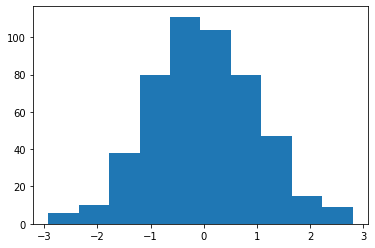

In [30]:
plt.hist(z_group["Age"])

In [0]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [32]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,196.343940,60.909064,40.451221,21385.958772
1,153.697110,48.005164,48.163870,19757.653998
2,146.713926,53.476714,31.144568,20279.476735
3,183.988501,71.785466,34.192437,19778.532678
4,179.805582,58.547234,32.501684,19346.337986
...,...,...,...,...
495,180.672252,51.029436,17.900334,20043.401932
496,151.602650,43.765061,27.617103,20241.297735
497,149.973149,67.190925,36.479521,19335.750899
498,163.669365,98.571932,35.257657,18888.280373


## Operaciones diversas muy útiles

In [33]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,196.343940,60.909064,40.451221,21385.958772
1,Male,Middle Class,153.697110,48.005164,48.163870,19757.653998
3,Male,Rich,183.988501,71.785466,34.192437,19778.532678
4,Male,Poor,179.805582,58.547234,32.501684,19346.337986
5,Female,Poor,172.074560,28.192775,42.997942,21277.967078
7,Female,Middle Class,166.360472,33.332115,19.958657,19611.989916


In [34]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
484,Female,Poor,237.863120,19.951759,49.066417,19810.325445
487,Male,Poor,227.539516,57.374036,25.997146,19157.948395
493,Female,Rich,169.567790,63.484671,29.763336,20821.406697
495,Female,Middle Class,180.672252,51.029436,17.900334,20043.401932
498,Male,Rich,163.669365,98.571932,35.257657,18888.280373
499,Male,Middle Class,148.236420,90.327894,13.374767,19467.309309


In [35]:
double_group.nth(32)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     110.180551  68.190065  49.949398  19487.156361
       Poor             158.853184  63.085928  25.005120  20216.239204
       Rich             162.750233  65.951638  40.062883  18023.726084
Male   Middle Class     161.936648  70.117613   4.067120  19697.088560
       Poor             158.631750  52.472696  24.187545  19964.779021
       Rich             171.473068  45.510527  47.831414  20692.308396

In [36]:
double_group.nth(82)

Height     Weight        Age        Income
Gender Economic Status                                               
Male   Poor             179.93339  76.802942  21.885402  20715.359892
       Rich             164.70270  86.880958  26.744570  19193.082787

In [0]:
data_sorted = data.sort_values(["Age", "Income"])

In [38]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
59,Female,Poor,219.118989,106.348681,-3.837400,21298.802624
148,Female,Middle Class,140.433589,88.161987,-3.010737,19892.145392
22,Female,Rich,220.042892,66.970892,-2.860013,18189.632418
154,Female,Middle Class,101.836328,78.121454,-2.139509,19793.479229
89,Male,Poor,193.682572,79.271949,-1.181704,21008.166187
259,Male,Rich,142.594132,67.007006,3.368029,20693.817605
209,Male,Middle Class,161.936648,70.117613,4.067120,19697.088560
299,Male,Poor,194.034042,52.824096,5.591800,21409.162676
402,Male,Middle Class,149.062605,52.035421,6.173861,21435.420795
354,Male,Poor,189.448738,78.337713,6.195454,21369.689456


In [0]:
age_grouped = data_sorted.groupby("Gender")

In [40]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
59,Female,Poor,219.118989,106.348681,-3.837400,21298.802624
89,Male,Poor,193.682572,79.271949,-1.181704,21008.166187


In [41]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
423,Male,Poor,165.152608,61.613466,59.082634,20577.920332
492,Female,Middle Class,173.475638,52.248953,64.993034,20516.979828


# Conjunto de entrenamiento y conjunto de testing

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv("/content/drive/My Drive/Curso Machine Learning con Python/datasets/customer-churn-model/Customer Churn Model.txt")

In [0]:
len(data)

3333

## Dividir utilizando la distribución normal

In [0]:
a = np.random.randn(len(data))

(array([  1.,  14.,  29.,  84., 111., 123.,  85.,  36.,   9.,   8.]),
 array([-3.19536083, -2.56704791, -1.93873498, -1.31042206, -0.68210914,
        -0.05379622,  0.5745167 ,  1.20282963,  1.83114255,  2.45945547,
         3.08776839]),
 <a list of 10 Patch objects>)

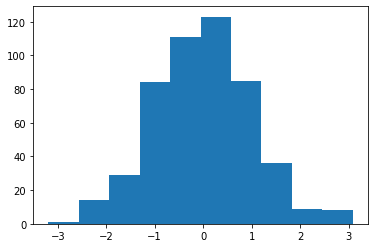

In [43]:
plt.hist(a)

In [0]:
check = (a<0.75) # No es el 75% de los datos, son los números que son < 0.75!!! 

In [45]:
check

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

(array([108.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 392.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

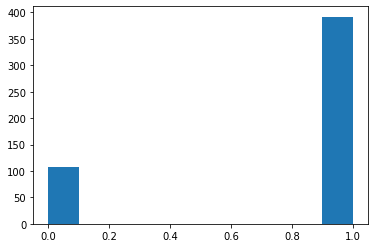

In [47]:
plt.hist(check.astype(int))#Ha cambiado en la versión 3.7 de python y necesita hacer un cast de bool a entero

In [0]:
training = data[check]
testing = data[~check]

In [49]:
len(training)

392

In [50]:
len(testing)

108

## Con la libreria sklearn

In [0]:
from sklearn.model_selection import train_test_split# Ha cambiado en la 3.7 de Python

In [0]:
train, test = train_test_split(data, test_size = 0.2)

In [54]:
len(train)

400

In [55]:
len(test)

100

## Usando una función de shuffle

In [0]:
import numpy as np

In [58]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,196.343940,60.909064,40.451221,21385.958772
1,Male,Middle Class,153.697110,48.005164,48.163870,19757.653998
2,Female,Rich,146.713926,53.476714,31.144568,20279.476735
3,Male,Rich,183.988501,71.785466,34.192437,19778.532678
4,Male,Poor,179.805582,58.547234,32.501684,19346.337986


In [0]:
import sklearn

In [0]:
data = sklearn.utils.shuffle(data)

In [0]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [62]:
len(train_data)

375

In [63]:
len(test_data)

124

# Concatenar y apendizar data sets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## El ejemplo del vino blanco y el vino tinto

Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set. 

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it ) 

1. Alcohol 
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.


Attribute Information:

All attributes are continuous 

No statistics available, but suggest to standardise variables for certain uses (e.g. for us with classifiers which are NOT scale invariant) 

NOTE: 1st attribute is class identifier (1-3)

In [0]:
import pandas as pd

In [6]:
red_wine = pd.read_csv("/content/drive/My Drive/Curso Machine Learning con Python/datasets/wine/winequality-red.csv", sep=";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
red_wine.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [8]:
red_wine.shape

(1599, 12)

In [9]:
white_wine = pd.read_csv("/content/drive/My Drive/Curso Machine Learning con Python/datasets/wine/winequality-white.csv", sep = ";")
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
white_wine.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [11]:
white_wine.shape

(4898, 12)

En python, tenemos dos tipos de ejes, 
* axis = 0 denota el eje horizontal
* axis = 1 denota el eje vertical

In [0]:
wine_data = pd.concat([red_wine, white_wine], axis = 0)

In [13]:
wine_data.shape

(6497, 12)

In [14]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
data1 = wine_data.head(10)
data2 = wine_data[300:310]
data3 = wine_data.tail(10)

In [0]:
wine_scramble = pd.concat([data1, data2, data3], axis = 0)

In [17]:
wine_scramble

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [18]:
wine_scramble = pd.concat([data2, data1, data3], axis = 0)
wine_scramble

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
300,7.5,0.530,0.06,2.60,0.086,20.0,44.0,0.99650,3.38,0.59,10.7,6
301,11.1,0.180,0.48,1.50,0.068,7.0,15.0,0.99730,3.22,0.64,10.1,6
302,8.3,0.705,0.12,2.60,0.092,12.0,28.0,0.99940,3.51,0.72,10.0,5
303,7.4,0.670,0.12,1.60,0.186,5.0,21.0,0.99600,3.39,0.54,9.5,5
304,8.4,0.650,0.60,2.10,0.112,12.0,90.0,0.99730,3.20,0.52,9.2,5
305,10.3,0.530,0.48,2.50,0.063,6.0,25.0,0.99980,3.12,0.59,9.3,6
306,7.6,0.620,0.32,2.20,0.082,7.0,54.0,0.99660,3.36,0.52,9.4,5
307,10.3,0.410,0.42,2.40,0.213,6.0,14.0,0.99940,3.19,0.62,9.5,6
308,10.3,0.430,0.44,2.40,0.214,5.0,12.0,0.99940,3.19,0.63,9.5,6
309,7.4,0.290,0.38,1.70,0.062,9.0,30.0,0.99680,3.41,0.53,9.5,6


## Datos distribuidos 

In [21]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/Curso Machine Learning con Python/datasets/distributed-data/001.csv")
data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [22]:
data.shape

(1461, 4)

* Importar el primer fichero
* Hacemos un bucle para ir recorriendo todos y cada uno de los ficheros. 
    * Importante tener una consistencia en el nombre de los ficheros 
    * Importamos los ficheros uno a uno
    * Cada uno de ellos debe apendizarse (añadirse al final) del primer fichero que ya habíamos cargado
* Repetimos el bucle hasta que no queden ficheros

In [0]:
filepath = "/content/drive/My Drive/Curso Machine Learning con Python/datasets/distributed-data/"

data = pd.read_csv(filepath+"001.csv")
final_length = len(data)

for i in range(2,333):
    if i < 10:
        filename = "00" + str(i)
    if 10 <= i < 100:
        filename = "0" + str(i)
    if i >= 100:
        filename = str(i)
    file = filepath + filename + ".csv"
    
    temp_data = pd.read_csv(file)
    final_length += len(temp_data)
    
    data = pd.concat([data, temp_data], axis = 0)

In [28]:
data.shape

(155220, 4)

In [29]:
data.tail()

,Date,sulfate,nitrate,ID
3282,2010-12-27,NaN,NaN,63
3283,2010-12-28,NaN,NaN,63
3284,2010-12-29,NaN,NaN,63
3285,2010-12-30,NaN,NaN,63
3286,2010-12-31,NaN,NaN,63


In [30]:
data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [31]:
final_length == data.shape[0]

True

# Joins de datasets

In [0]:
filepath = "/content/drive/My Drive/Curso Machine Learning con Python/datasets/athletes/"

In [0]:
data_main = pd.read_csv(filepath + "Medals.csv", encoding= "ISO-8859-1")

In [0]:
data_main.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [0]:
a = data_main["Athlete"].unique().tolist()
len(a)

6956

In [0]:
data_main.shape

(8618, 8)

In [0]:
data_country = pd.read_csv(filepath + "Athelete_Country_Map.csv", encoding = "ISO-8859-1")

In [0]:
data_country.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [0]:
len(data_country)

6970

In [0]:
data_country[data_country["Athlete"] == "Aleksandar Ciric"]

,Athlete,Country
1029,Aleksandar Ciric,Serbia
1086,Aleksandar Ciric,Serbia and Montenegro


In [0]:
data_sports = pd.read_csv(filepath + "Athelete_Sports_Map.csv", encoding="ISO-8859-1")

In [36]:
data_sports.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [0]:
len(data_sports)

6975

In [0]:
data_sports[(data_sports["Athlete"]=="Chen Jing") | 
            (data_sports["Athlete"]=="Richard Thompson") | 
            (data_sports["Athlete"]=="Matt Ryan")
           ]

,Athlete,Sport
528,Richard Thompson,Athletics
1308,Chen Jing,Volleyball
1419,Chen Jing,Table Tennis
2727,Matt Ryan,Rowing
5003,Matt Ryan,Equestrian
5691,Richard Thompson,Baseball


In [0]:
data_country_dp = data_country.drop_duplicates(subset="Athlete")

In [0]:
len(data_country_dp)==len(a)

True

In [0]:
data_main_country = pd.merge(left = data_main, right = data_country_dp,
                            left_on="Athlete", right_on = "Athlete")

In [0]:
data_main_country.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [0]:
data_main_country.shape

(8618, 9)

In [0]:
data_main_country[data_main_country["Athlete"] == "Aleksandar Ciric"]

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1491,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1492,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1493,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia


In [0]:
data_sports_dp = data_sports.drop_duplicates(subset="Athlete")

In [0]:
len(data_sports_dp)==len(a)

True

In [0]:
data_final = pd.merge(left=data_main_country, right=data_sports_dp,
                     left_on="Athlete", right_on="Athlete")

In [0]:
data_final.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming


In [0]:
data_final.shape

(8618, 10)

## Tipos de Joins

In [0]:
from IPython.display import Image
import numpy as np

**Inner Join <= A (Left Join), B (Right Join) <= Outer Join**

In [0]:
out_athletes = np.random.choice(data_main["Athlete"], size = 6, replace = False)

In [0]:
out_athletes

array(['Oscar Braison', 'Erik Vendt', 'Yuliya Zaripova',
       'Erzsébet Márkus-Peresztegi', 'Belinda Snell', 'Alfredo Despaigne'],
      dtype=object)

In [0]:
data_country_dlt = data_country_dp[(~data_country_dp["Athlete"].isin(out_athletes)) & 
                                   (data_country_dp["Athlete"] != "Michael Phelps")]

data_sports_dlt = data_sports_dp[(~data_sports_dp["Athlete"].isin(out_athletes)) &
                                (data_sports_dp["Athlete"] != "Michael Phelps")]

data_main_dlt = data_main[(~data_main["Athlete"].isin(out_athletes)) & 
                         (data_main["Athlete"] != "Michael Phelps")]


In [0]:
len(data_country_dlt)

6949

In [0]:
len(data_sports_dlt)

6949

In [0]:
len(data_main_dlt)

8605

## Inner Join
* Devuelve un data frame con las filas que tienen valor tanto en el primero como en el segundo data frame que estamos uniendo
* El número de filas será igual al número de filas **comunes** que tengas ambos data sets
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Ambos comparten 30 filas
    * Entonces A Inner Join B tendrá 30 filas
* En términos de teoría de conjuntos, se trata de la intersección de los dos conjuntos

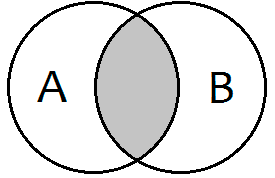

In [0]:
Image(filename="resources/inner-join.png")

In [0]:
# data_main contiene toda la info
# data_country_dlt le falta la info de 7 atletas
merged_inner = pd.merge(left = data_main, right = data_country_dlt,
                       how = "inner", left_on = "Athlete", right_on = "Athlete")

In [0]:
len(merged_inner)

8605

In [0]:
merged_inner.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
1,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States
2,Natalie Coughlin,29.0,2012,08/12/2012,0,0,1,1,United States
3,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia
4,Alicia Coutts,24.0,2012,08/12/2012,1,3,1,5,Australia


## Left Join
* Devuelve un data frame con las filas que tuvieran valor en el dataset de la izquierda, sin importar si tienen correspondencia en el de la derecha o no.
* Las filas del data frame final que no correspondan a ninguna fila del data frame derecho, tendrán NAs en las columnas del data frame derecho.
* El número de filas será igual al número de filas del data frame izquierdo
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Entonces A Left Join B tendrá 60 filas
* En términos de teoría de conjuntos, se trata del propio data set de la izquierda quien, además tiene la intersección en su interior.

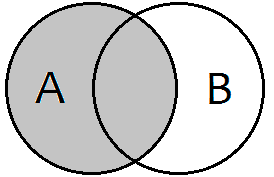

In [0]:
Image(filename="resources/left-join.png")

In [0]:
merged_left = pd.merge(left = data_main, right = data_country_dlt, 
                      how = "left", left_on = "Athlete", right_on = "Athlete")
len(merged_left)

8618

In [0]:
merged_left.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,NaN
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,NaN
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,NaN
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia


## Right Join
* Devuelve un data frame con las filas que tuvieran valor en el dataset de la derecha, sin importar si tienen correspondencia en el de la izquierda o no.
* Las filas del data frame final que no correspondan a ninguna fila del data frame izquierdo, tendrán NAs en las columnas del data frame izquierdo.
* El número de filas será igual al número de filas del data frame derecho
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Entonces A Right Join B tendrá 50 filas
* En términos de teoría de conjuntos, se trata del propio data set de la derecha quien, además tiene la intersección en su interior.

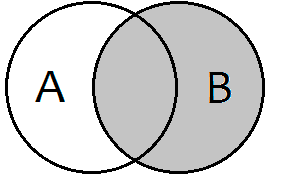

In [0]:
Image(filename="resources/right-join.png")

In [0]:
merged_right = pd.merge(left = data_main_dlt, right = data_country_dp,
                       how = "right", left_on = "Athlete", right_on = "Athlete")
len(merged_right)

8612

In [0]:
merged_right.tail(10)

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8602,Wietse van Alten,21.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Netherlands
8603,Sandra Wagner-Sachse,31.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Germany
8604,Rod White,23.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,United States
8605,Michael Phelps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
8606,Erzsébet Márkus-Peresztegi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hungary
8607,Erik Vendt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
8608,Oscar Braison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cuba
8609,Alfredo Despaigne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cuba
8610,Belinda Snell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
8611,Yuliya Zaripova,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia


## Outer Join
* Devuelve un data frame con todas las filas de ambos, reemplazando las ausencias de uno o de otro con NAs en la región específica..
* Las filas del data frame final que no correspondan a ninguna fila del data frame derecho (o izquierdo), tendrán NAs en las columnas del data frame derecho (o izquierdo).
* El número de filas será igual al máximo número de filas de ambos data frames
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Ambos comparten 30 filas
    * Entonces A Outer Join B tendrá 60 + 50 - 30 = 80 filas
* En términos de teoría de conjuntos, se trata de la unión de conjuntos.

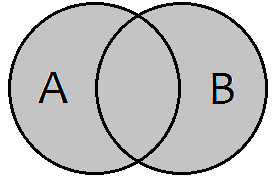

In [0]:
Image(filename="resources/outer-join.png")

In [0]:
data_country_jb = data_country_dlt.append(
    {
        "Athlete": "Juan Gabriel Gomila",
        "Country": "España"
    },ignore_index = True
)

In [0]:
merged_outer = pd.merge(left = data_main, right=data_country_jb,
                       how = "outer", left_on = "Athlete", right_on="Athlete")
len(merged_outer)

8619

In [0]:
merged_outer.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008.0,08/24/2008,8.0,0.0,0.0,8.0,NaN
1,Michael Phelps,19.0,2004.0,08/29/2004,6.0,0.0,2.0,8.0,NaN
2,Michael Phelps,27.0,2012.0,08/12/2012,4.0,2.0,0.0,6.0,NaN
3,Natalie Coughlin,25.0,2008.0,08/24/2008,1.0,2.0,3.0,6.0,United States
4,Natalie Coughlin,21.0,2004.0,08/29/2004,2.0,2.0,1.0,5.0,United States


In [0]:
merged_outer.tail()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8614,Kateryna Serdiuk,17.0,2000.0,10/01/2000,0.0,1.0,0.0,1.0,Ukraine
8615,Wietse van Alten,21.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Netherlands
8616,Sandra Wagner-Sachse,31.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Germany
8617,Rod White,23.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,United States
8618,Juan Gabriel Gomila,NaN,NaN,NaN,NaN,NaN,NaN,NaN,España


In [0]:
len(data_main)

8618

In [0]:
len(data_main_dlt)

8605

In [0]:
len(data_country_dp)

6956

In [0]:
len(data_country_dlt)

6949

In [0]:
len(merged_inner)

8605

In [0]:
len(merged_left)

8618

In [0]:
len(merged_right)

8612

In [0]:
len(merged_outer)

8619